# The analysis scripts for Bulk system of fcc Si

## Free energy versus lattice constant

In the file `SUMMARY.fcc`

+ The 1st column: lattice parameter (in Å units)
+ The 2nd column: unit number (always 1 in this case)
+ The 3rd column: free energy (in eV units)
+ The 4th column: initial energy (in eV units)
+ The 5th column: energy change (difference between initial and current energy, in eV units)

In [11]:
# Extract the data for the free energy versus lattice constant

with open('Bulk_fcc_Ni/SUMMARY.fcc', 'r') as f:
    lines = f.readlines()

# Initialize the lists for lattice constant and free energy
lattice_list, free_energy_list, initial_energy_list, difference_energy_list = [], [], [], []

# Loop through each line in the file
for line in lines:
    # Check if the line contains the required information
    if 'F=' in line and 'E0=' in line and 'd E =' in line:
        # Extract the lattice constant
        lattice = float(line.split()[0])
        lattice_list.append(lattice)
        # Extract the free energy
        free_energy = float(line.split()[3])
        free_energy_list.append(free_energy)
        # Extract the initial energy
        initial_energy = float(line.split()[5])
        initial_energy_list.append(initial_energy)
        # Extract the energy change
        difference_energy = float(line.split()[8].replace('=',''))
        difference_energy_list.append(difference_energy)

# Print the results
# print('Lattice constant:', lattice_list)
# print('Free energy:', free_energy_list)
# print('Initial energy:', initial_energy_list)
# print('Energy change:', difference_energy_list)


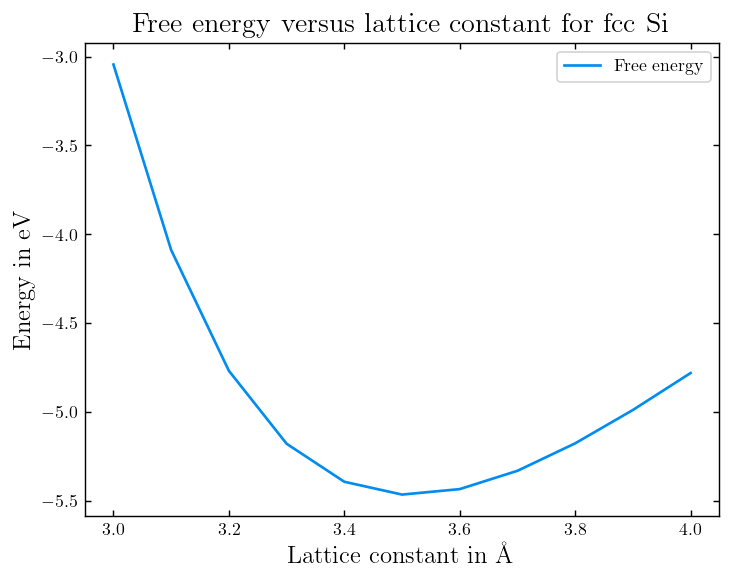

In [12]:
# Plot
import numpy as np
import matplotlib.pyplot as plt

# Set up the specified style parameters
plt.figure(dpi=128)
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

plt.title("Free energy versus lattice constant for fcc Si"); plt.xlabel(r"Lattice constant in Å"); plt.ylabel(r"Energy in eV")
plt.plot(lattice_list, free_energy_list, c="#008CF0", label="Free energy")
# plt.plot(lattice_list, initial_energy_list, c="#FA9600", label="Initial energy")
# plt.plot(lattice_list, difference_energy_list, c="#8C64F0", label="Energy change")

plt.legend(loc="best")


## Electronic density versus energy

In [13]:
# Import the necessary packages
import xml.etree.ElementTree as ET

# Analysis vasprun.xml file
tree = ET.parse('Bulk_fcc_Ni_DOS/vasprun.xml')
root = tree.getroot()

# Extract Fermi energy
efermi = float(root.find(".//i[@name='efermi']").text)

# Extract Energies Total DOS Integrated DOS
energies_list, total_dos_list, integrated_dos_list = [], [], []

for r_element in root.findall(".//set[@comment='spin 1']/r"):
    values = list(map(float, r_element.text.split()))
    energies = values[0]
    energies_list.append(energies)
    total_dos = values[1]
    total_dos_list.append(total_dos)
    integrated_dos = values[2]
    integrated_dos_list.append(integrated_dos)

# print("Fermi energy:", efermi)
# print("Energies:", energies_list)
# print("Total DOS:", total_dos_list)
# print("Integrated DOS:", integrated_dos_list)

# print(efermi)
# print(len(energies_list), energies_list)
# print(len(total_dos_list), total_dos_list)
# print(len(integrated_dos_list), integrated_dos_list)


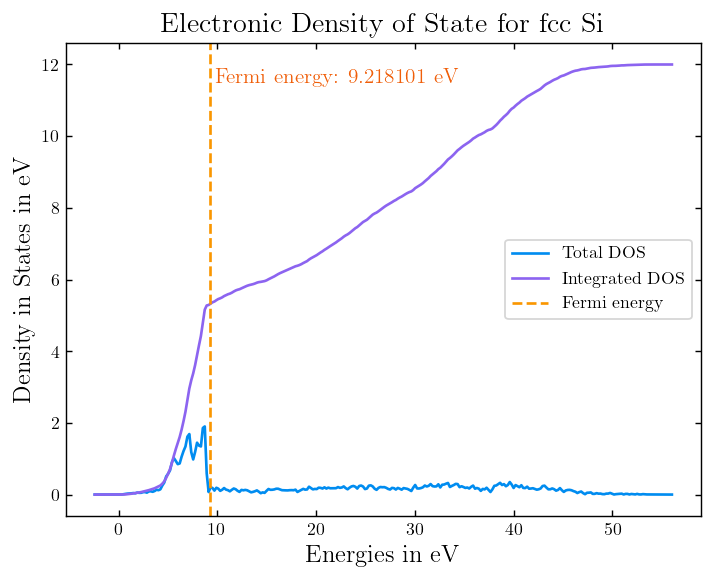

In [14]:
# Plot
import numpy as np
import matplotlib.pyplot as plt

# Set up the specified style parameters
plt.figure(dpi=128)
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

plt.title("Electronic Density of State for fcc Si"); plt.xlabel(r"Energies in eV"); plt.ylabel(r"Density in States in eV")
plt.plot(energies_list[0:300], total_dos_list[0:300], c="#008CF0", label="Total DOS")
plt.plot(energies_list[0:300], integrated_dos_list[0:300], c="#8C64F0", label="Integrated DOS")

# Plot Fermi energy as a vertical line
plt.axvline(x=efermi, linestyle="--", color="#FA9600", label="Fermi energy")

# Add Fermi energy value to the plot
fermi_energy_text = f"Fermi energy: {efermi:.6f} eV"
plt.text(efermi+0.5, 11.5, fermi_energy_text, fontsize=12, color="#F05F0A", rotation=0)

# plt.ylim(0,26)
plt.legend(loc="best")
plt.show()


## Bandstructure

The band structure is demonstrated with Energy (in eV) versus K-point distance (in Å).

figure numbers: [1]


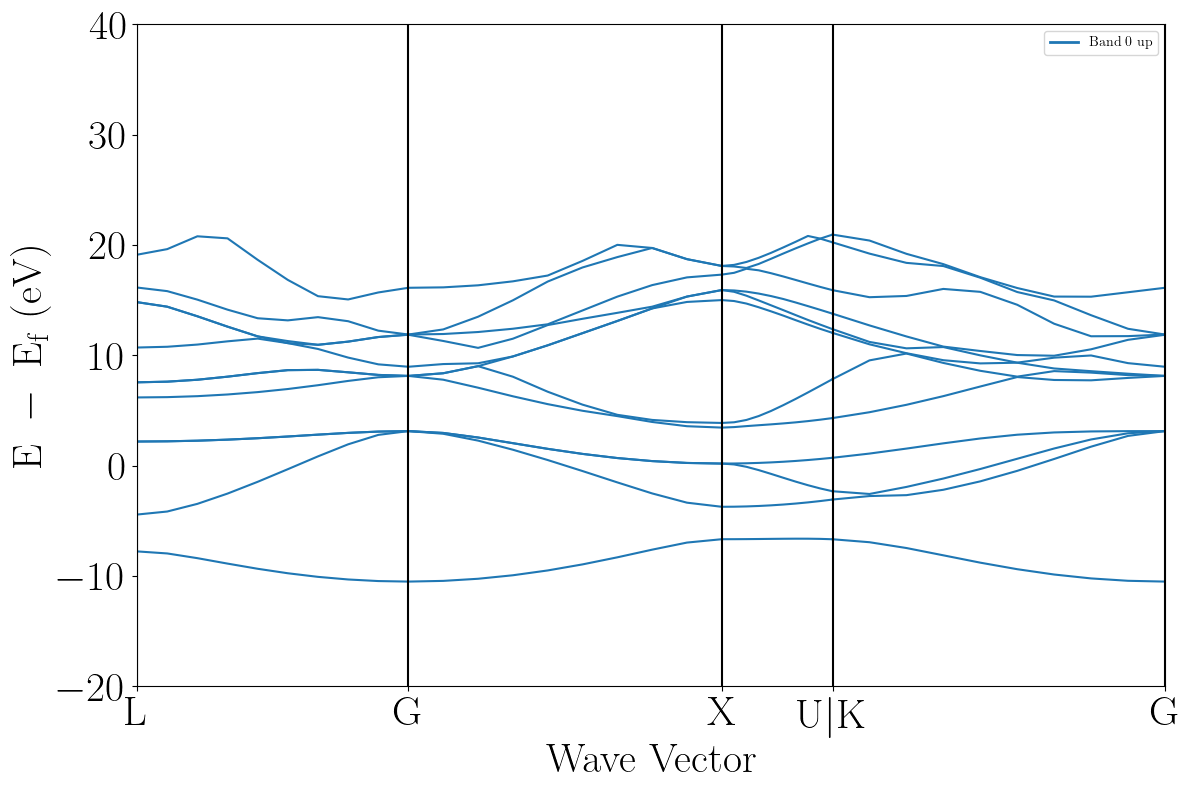

In [15]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.io.vasp import Vasprun

# Extract the band structure data from the vasprun.xml file
vasprun = Vasprun("Bulk_fcc_Si_bandstructure/vasprun.xml")
band_structure = vasprun.get_band_structure(line_mode=True) # Save file 

# Use pymatgen's BSPlotter tool to create the band structure plot
plotter = BSPlotter(band_structure) 
band_plot = plotter.get_plot(ylim=(-20, 40))

axes = plt.gca()

print("figure numbers:",plt.get_fignums())

